<a href="https://colab.research.google.com/github/DuarteMagano/Hello-Quantum-World/blob/main/tutorial_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install qiskit==1.3.2 pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=3c807973d5e8ec34ff76a9ad7e986bdcbb7fb78d981f77f7903a6f33a3cf7130
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


# States of probability

In [ ]:
import numpy as np

# Quantum states

In [57]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [39]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [42]:
u.draw("text")

[0.70710678+0.j,0.70710678+0.j]

In [45]:
v.draw("text")

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [46]:
v.draw("latex")

<IPython.core.display.Latex object>

In [47]:
u.is_valid()

True

In [56]:
outcome, state = u.measure()
print(f"{outcome = }")
print("Post-measurement state:"); display(state.draw("latex"))

outcome = '0'
Post-measurement state:


<IPython.core.display.Latex object>

In [51]:
u.draw("latex")

<IPython.core.display.Latex object>

In [52]:
state.draw("latex")

<IPython.core.display.Latex object>

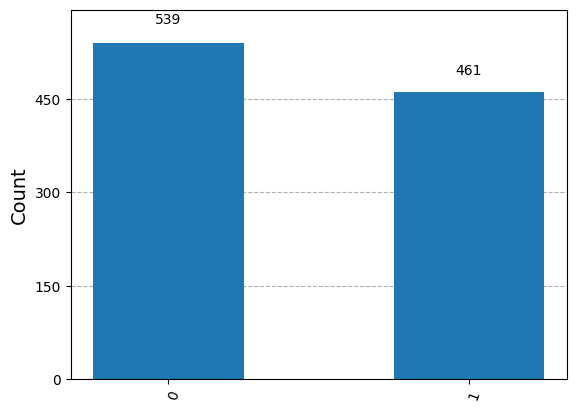

In [58]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [ ]:
\

# Quantum operations

In [68]:
from qiskit.quantum_info import Operator

In [79]:
U = Operator(np.array([[0., 1.],
                       [1., 0.]]))

In [81]:
U.draw("latex")

<IPython.core.display.Latex object>

In [85]:
U.num_qubits

1

In [83]:
U_unphysical = Operator(np.array([[2., 2.],
                                  [1., 0.]]))

In [86]:
U_unphysical.is_unitary()

False

In [76]:
X = Operator.from_label("XX")

In [77]:
X.draw("latex")

<IPython.core.display.Latex object>

# Quantum circuits

In [38]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Drafts

In [18]:
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')

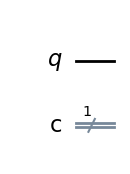

In [19]:
qc = QuantumCircuit(qreg, creg, name='First circuit')
qc.draw('mpl')

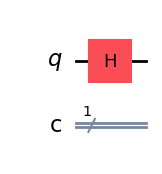

In [20]:
qubit = qreg[0]
qc.h(qubit)  # Gate H
qc.draw('mpl')

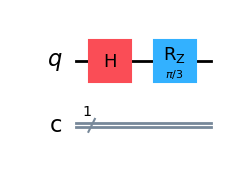

In [21]:
phi = np.pi / 3
qc.rz(phi, qubit)
qc.draw('mpl')

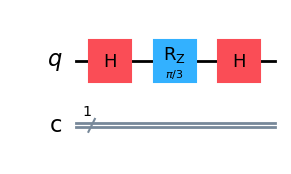

In [22]:
qc.h(qreg[0])
qc.draw('mpl')

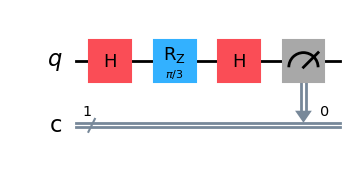

In [23]:
bit = creg[0]
qc.measure(qubit, bit)
qc.draw('mpl')

In [24]:
sampler = StatevectorSampler()
NSHOTS = 4096

In [25]:
job = sampler.run([qc], shots=NSHOTS)
print(job.status())

JobStatus.RUNNING


In [26]:
print(job.status())

JobStatus.DONE


In [34]:
counts = job.result()[0].data.c.get_counts()
print(f"{counts = }")

counts = {'0': 3049, '1': 1047}


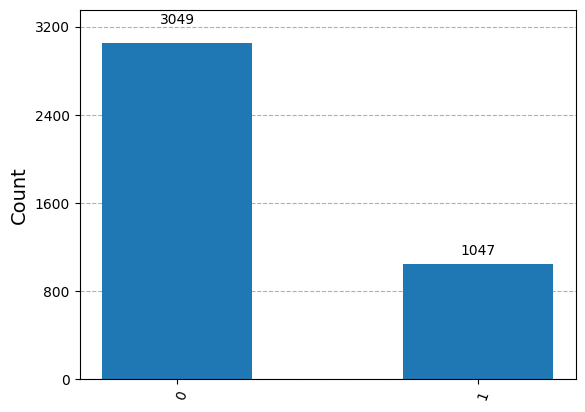

In [36]:
plot_histogram(counts)